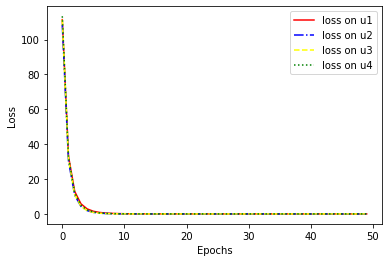

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def read_data(path, user=None, item=None):
    if user is None or item is None:
        with open(path, "rb") as f:
            users = 0
            items = 0
            for lines in f:
                data_split = lines.decode().split("\t")
                user_id, item_id, rating = int(data_split[0]), int(data_split[1]), int(data_split[2])
                if user_id > users:
                    users = user_id
                if item_id > items:
                    items = item_id
    else:
        users = user
        items = item

    # initialize the matrix with all zero
    rating_matrix = np.zeros((users, items))

    # fill the rating_matrix with the data in the dataset
    with open(path, "rb") as f:
        for line in f:
            data_split = line.decode().split("\t")
            user_id, item_id, rating = int(data_split[0]), int(data_split[1]), int(data_split[2])
            rating_matrix[user_id - 1][item_id - 1] = rating
        return rating_matrix, users, items


def train_and_validation(train_data_path, validation_data_path):
    users = np.shape(train_data_path)[0]
    items = np.shape(train_data_path)[1]

    # set parameters
    k = 150
    LR = 0.0002 # learning rate
    epochs = 50 # iterations time
    penalty_factor = 100

    # initialize users matrix P and goods matrix Q and the loss
    P = np.random.rand(users, k)
    # print(P.shape) // (943,150)
    Q = np.random.rand(items, k)
    # print(Q.shape) // (1682,150)
    Loss = []

    # SGD in Matrix Factorization
    for epoch in range(epochs):
        for user in range(users):
            for item in range(items):
                # update P and Q
                if train_data_path[user][item] > 0:
                    P[user] += LR * (Q[item] * (train_data_path[user][item] - np.dot(P[user], Q[item])) -
                                     penalty_factor * P[user])
                    Q[item] += LR * (P[user] * (train_data_path[user][item] - np.dot(P[user], Q[item])) -
                                     penalty_factor * Q[item])
        # calculate the loss value each iteration
        loss = np.sum(np.power(validation_data_path - np.dot(P, Q.transpose()), 2)) / (users * items)
        + penalty_factor * (np.sum(np.power(P, 2)) + np.sum(np.power(Q.transpose(), 2))) / k
        Loss.append(loss)

    # final rating matrix
    R = np.dot(P, Q.transpose())
    # print(R.shape) // (943, 1682)
    return Loss, R


# plot
def plot(loss1, loss2, loss3, loss4):
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(loss1, label="loss on u1", color="red", linestyle='-')
    plt.plot(loss2, label="loss on u2", color="blue", linestyle='-.')
    plt.plot(loss3, label="loss on u3", color="yellow", linestyle="--")
    plt.plot(loss4, label="loss on u4", color="green", linestyle=':')
    # plt.plot(loss5, label="loss on u5", color="purple", linestyle='-', linewidth=1.5)
    plt.legend()
    plt.savefig("SGD_Recommender")
    plt.show()


if __name__ == "__main__":
    train1, users1, items1 = read_data("dataset/ml-100k/u1.base")
    test1, users_1, items_1 = read_data("dataset/ml-100k/u1.test", users1, items1)
    loss1, R1 = train_and_validation(train1, test1)

    train2, users2, items2 = read_data("dataset/ml-100k/u2.base")
    test2, users_2, items_2 = read_data("dataset/ml-100k/u2.test", users2, items2)
    loss2, R2 = train_and_validation(train2, test2)

    train3, users3, items3 = read_data("dataset/ml-100k/u3.base")
    test3, users_3, items_3 = read_data("dataset/ml-100k/u3.test", users3, items3)
    loss3, R3 = train_and_validation(train3, test3)

    train4, users4, items4 = read_data("dataset/ml-100k/u4.base")
    test4, users_4, items_4 = read_data("dataset/ml-100k/u4.test", users4, items4)
    loss4, R4 = train_and_validation(train4, test4)

    '''
    train5, users5, items5 = read_data("dataset/ml-100k/u5.base")
    test5, users_5, items_5 = read_data("dataset/ml-100k/u5.test", users5, items5)
    loss5, R5 = train_and_validation(train5, test5)
    '''

    plot(loss1, loss2, loss3, loss4)

